## Face Recognition – Unlock Your Application With Your Face!


### Step 1 - Create Training Data

In [4]:
import cv2
import numpy as np

# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

# Initialize Webcam
cap = cv2.VideoCapture(0)
count = 0

# Collect 100 samples of your face from webcam input
while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (200, 200))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save file in specified directory with unique name
        file_name_path = './faces/user/' + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        print("Face not found")
        pass

    if cv2.waitKey(1) == 13 or count == 100: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

Face not found
Face not found
Face not found
Face not found
Face not found


### Step 2 - Train Model

In [5]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

# Get the training data we previously made
data_path = './faces/user/'
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]

# Create arrays for training data and labels
Training_Data, Labels = [], []

# Open training images in our datapath
# Create a numpy array for training data
for i, files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    Training_Data.append(np.asarray(images, dtype=np.uint8))
    Labels.append(i)

# Create a numpy array for both training data and labels
Labels = np.asarray(Labels, dtype=np.int32)

# Initialize facial recognizer
model = cv2.face.LBPHFaceRecognizer_create()

# NOTE: For OpenCV 3.0 use cv2.face.createLBPHFaceRecognizer()

# Let's train our model 
model.train(np.asarray(Training_Data), np.asarray(Labels))
print("Model trained sucessefully")


AttributeError: module 'cv2.cv2' has no attribute 'face'

### Step 3 - Run Our Facial Recognition

In [8]:
import cv2
import numpy as np


face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

def face_detector(img, size=0.5):
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img, []
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))
    return img, roi


# Open Webcam
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    
    image, face = face_detector(frame)
    
    try:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Pass face to prediction model
        # "results" comprises of a tuple containing the label and the confidence value
        results = model.predict(face)
        
        if results[1] < 500:
            confidence = int( 100 * (1 - (results[1])/400) )
            display_string = str(confidence) + '% Confident it is User'
            
        cv2.putText(image, display_string, (100, 120), cv2.FONT_HERSHEY_COMPLEX, 1, (255,120,150), 2)
        
        if confidence > 75:
            cv2.putText(image, "Unlocked", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
            cv2.imshow('Face Recognition', image )
        else:
            cv2.putText(image, "Locked", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
            cv2.imshow('Face Recognition', image )

    except:
        cv2.putText(image, "No Face Found", (220, 120) , cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
        cv2.putText(image, "Locked", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
        cv2.imshow('Face Recognition', image )
        pass
        
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()     

In [9]:
import pandas as pd

In [10]:
cv2.imshow()

TypeError: imshow() missing required argument 'winname' (pos 1)

In [11]:
import cv2
import numpy as np
import time

# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

# Initialize Webcam
cap = cv2.VideoCapture(0)
count = 0
lst=[]
start_time=time.time()
elapsed_time=time.time()
# Collect 100 samples of your face from webcam input
while True:
    
    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        start_time = time.time()
        face = cv2.resize(face_extractor(frame), (200, 200))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Put count on images and display live count
        cv2.putText(face, str(time.clock()), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        
        print("Face not found")
        elapsed_time = time.time() - start_time
        lst.append(elapsed_time)
        seconds=0
        time.sleep(1)
        pass

    if cv2.waitKey(1) == 13: #13 is the Enter Key
        
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Face not found
Face not found
Face not found


In [12]:
lst

[0.03690147399902344, 1.0522046089172363, 0.05485343933105469]

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

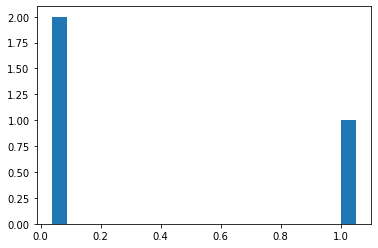

In [14]:
import matplotlib.pyplot as plt
plt.hist(lst,bins=20,)
plt.show()

In [15]:
import datetime
datetime.datetime.now()-time.clock()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'float'

In [16]:
import time

In [17]:
start_time = time.time()
time.sleep(5)
elapsed_time = time.time() - start_time
print(elapsed_time)

5.000815391540527
